In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
import os
for dirname, _, filenames in os.walk('/home/soetcse/Documents'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/soetcse/Documents/nn_backprop.py
/home/soetcse/Documents/train.csv
/home/soetcse/Documents/irisTestData.txt
/home/soetcse/Documents/multiple.c
/home/soetcse/Documents/test.csv
/home/soetcse/Documents/irisTrainData.txt


In [24]:
# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [25]:
train_data = pd.read_csv("/home/soetcse/Documents/train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
test_data = pd.read_csv("/home/soetcse/Documents/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


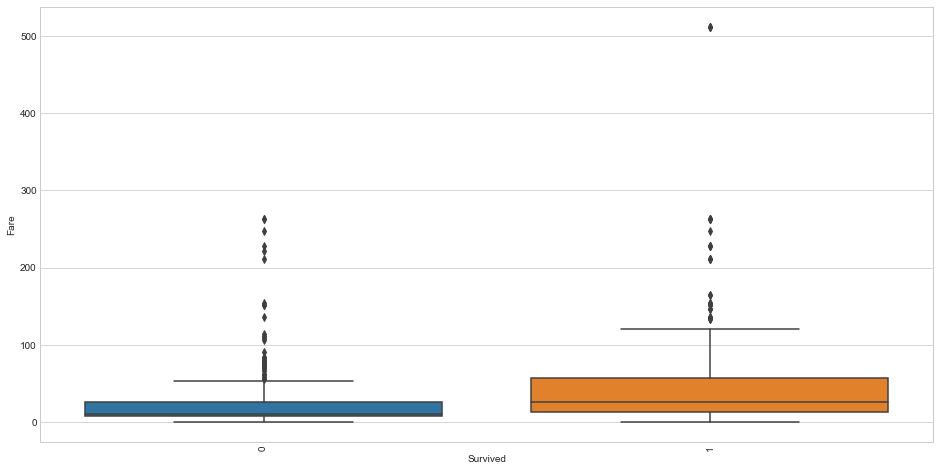

In [29]:
data = pd.concat([train_data['Survived'], train_data['Fare']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train_data['Survived'], y=train_data['Fare'], data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

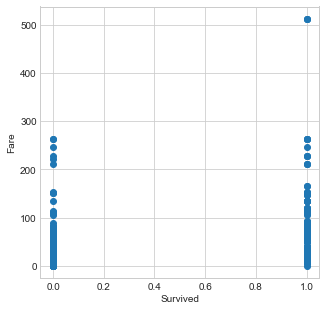

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(train_data['Survived'],train_data['Fare'])
ax.set_xlabel('Survived')
ax.set_ylabel('Fare')
plt.show()

In [31]:
train_data[train_data['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [32]:
test_data[test_data['Fare'] > 500]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [33]:
#do it for both sets
train_data["Fare"].replace({ 512.3292 : 7.25}, inplace=True)
test_data["Fare"].replace({ 512.3292 : 7.25}, inplace=True)
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)

In [34]:
train_data = train_data[(train_data.PassengerId != 259) & (train_data.PassengerId != 680) & (train_data.PassengerId != 738)]
#test_data = test_data[(test_data.PassengerId != 1235)]

In [35]:
#train_data[train_data['PassengerId'] == 680]

In [36]:
#train_data[train_data['PassengerId'] == 738]

In [37]:
#test_data[test_data['PassengerId'] == 1235]

In [38]:
#Check for na's
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [39]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
import missingno as msno 
#msno.bar(train_data) 

In [41]:
#train data has 177 age nans
m = train_data['Age'].mean()
m

29.67534458509142

In [42]:
#test data has 86 age nans
m = test_data['Age'].mean()
m

30.272590361445783

In [44]:
train_data['Age'] = train_data['Age'].replace(np.nan, 29)
test_data['Age'] = test_data['Age'].replace(np.nan, 30)

In [45]:
#next is cabin 
#Shows there is more than 60% of NA's for the column so we should drop it. Judging by .info()
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [46]:
#embarked on train data is only 2 nans
#embarked on test data is 0
train_data['Embarked'] = train_data['Embarked'].replace(np.nan, 'Q')

#Fare on train data is 0 nans
#Fare on test data is 1
#m = test_data['Fare'].mean()
#The mean obtained was 36 for the column 'Fare'
test_data['Fare'] = test_data['Fare'].replace(np.nan, 36.0)

In [47]:
#Check for na's
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [48]:
#Check for na's
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [49]:
# create a new feature to extract title names from the Name column
#We can see that there are alot of extra names we dont need.
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.Title.value_counts()

Mr              515
Miss            181
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Jonkheer          1
Lady              1
Don               1
Ms                1
Capt              1
Sir               1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [50]:
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [51]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royal",
    "Don":        "Royal",
    "Sir" :       "Royal",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royal",
    "Dona":       "Royal",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royal"
}
# map the normalized titles to the current titles for train and test data.
train_data.Title = train_data.Title.map(normalized_titles)
test_data.Title = test_data.Title.map(normalized_titles)



In [52]:
# view value counts for the normalized titles
test_data.Title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royal        1
Name: Title, dtype: int64

In [53]:
# view value counts for the normalized titles
train_data.Title.value_counts()

Mr         515
Miss       183
Mrs        127
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize label endoce as first step.
le = LabelEncoder()

train_data["Sex"] = le.fit_transform(train_data["Sex"].values)
test_data["Sex"] = le.fit_transform(test_data["Sex"].values)

In [55]:
# for now we drop ticket column
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [56]:
train_data["Embarked"].value_counts()

S    644
C    165
Q     79
Name: Embarked, dtype: int64

In [57]:
#label encode them 
#train_data["Embarked"] = le.fit_transform(train_data["Embarked"].values)
train_data["Embarked"] = le.fit_transform(train_data["Embarked"].astype(str))
#test_data["Embarked"] = le.fit_transform(test_data["Embarked"].values)
test_data["Embarked"] = le.fit_transform(test_data["Embarked"].astype(str))

In [58]:
#train_data["Name"] = le.fit_transform(train_data["Name"].values)
#test_data["Name"] = le.fit_transform(test_data["Name"].values)
train_data["Name"] = le.fit_transform(train_data["Name"].astype(str))
test_data["Name"] = le.fit_transform(test_data["Name"].astype(str))

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    int64  
 4   Sex          888 non-null    int64  
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Fare         888 non-null    float64
 9   Embarked     888 non-null    int64  
 10  Title        888 non-null    object 
dtypes: float64(2), int64(8), object(1)
memory usage: 83.2+ KB


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Title        418 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 32.8+ KB


In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,108,1,22.0,1,0,7.2500,2,Mr
1,2,1,1,189,0,38.0,1,0,71.2833,0,Mrs
2,3,1,3,352,0,26.0,0,0,7.9250,2,Miss
3,4,1,1,271,0,35.0,1,0,53.1000,2,Mrs
4,5,0,3,15,1,35.0,0,0,8.0500,2,Mr


In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,206,1,34.5,0,0,7.8292,1,Mr
1,893,3,403,0,47.0,1,0,7.0000,2,Mrs
2,894,2,269,1,62.0,0,0,9.6875,1,Mr
3,895,3,408,1,27.0,0,0,8.6625,2,Mr
4,896,3,178,0,22.0,1,1,12.2875,2,Mrs


In [62]:
#With the power of google, many people say logistic regression is the best for titanic datasets.
#although lightgbm is more suited 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as gbm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [46]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 59 kB/s s eta 0:00:01    |███████████████▉                | 77.7 MB 8.7 MB/s eta 0:00:10     |████████████████▉               | 82.7 MB 10.3 MB/s eta 0:00:08     |█████████████████▋              | 86.6 MB 10.3 MB/s eta 0:00:07


In [48]:
!pip install lightgbm

     |████████████████████████████████| 1.8 MB 3.4 MB/s eta 0:00:01


In [64]:
features = ["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = train_data[features]
y = train_data['Survived']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.15)

#Last bit - encode labels
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [65]:
#random forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

#submission
y_pred_sub = model.predict(test_data[features])  

y_pred_random = model.predict(X_test)
forest = accuracy_score(y_test, y_pred_random)
print(forest)

0.7910447761194029


In [66]:
#logistic regression¶
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
logistic = accuracy_score(y_test, y_pred)
print(logistic)

0.7686567164179104


In [67]:
#XGBOOST¶
use_label_encoder=False
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)  
XGB = accuracy_score(y_test, y_pred)
print(XGB)

/home/soetcse/anaconda3/envs/DeepLearning_Env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:09:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7910447761194029


In [68]:
#KNeighborsClassifier¶
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(X_train, y_train)
y_pred = KN.predict(X_test)  
knn = accuracy_score(y_test, y_pred)
print(knn)

0.7835820895522388


In [69]:
#SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)  
SVC = accuracy_score(y_test, y_pred)
print(SVC)

0.7761194029850746


In [70]:
#Linear SVC
lsvc = LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)  
LSVC = accuracy_score(y_test, y_pred)
print(LSVC)

0.7686567164179104


In [71]:
finalleaderboard = {
  "Random Forest": forest,
  "logistic regression": logistic,  
  "XGB": XGB,
  "KNeighborsClassifier": knn,
  "SVC": SVC,
  "Linear SVC": LSVC  
}

finalleaderboard = pd.DataFrame.from_dict(finalleaderboard, orient='index', columns=['Accuracy'])
print(finalleaderboard)

                      Accuracy
Random Forest         0.791045
logistic regression   0.768657
XGB                   0.791045
KNeighborsClassifier  0.783582
SVC                   0.776119
Linear SVC            0.768657


In [72]:
len(y_pred_random)

134